In [1]:
# Importar Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay

In [ ]:
# 1. Cargar y explorar los datos
# Cargar el dataset
Datos = pd.read_csv('Titanic-Dataset.csv')

In [3]:
# Mostrar una muestra de los datos
print("Primeras filas del dataset:")
print(Datos.head(10))

Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarth

In [4]:
# Mostrar información general
print("\nInformación del dataset:")
print(Datos.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(Datos.describe())


Estadísticas descriptivas:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


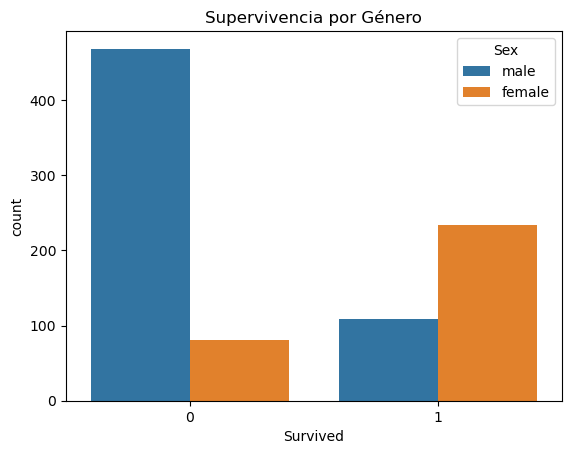

In [6]:
# Visualizar supervivencia por género
sns.countplot(data=Datos, x='Survived', hue='Sex')
plt.title('Supervivencia por Género')
plt.show()

In [ ]:
# 2. Limpieza y preparación de datos
# Verificar valores nulos
print("\nValores nulos antes de la limpieza:")
print(Datos.isnull().sum())


Valores nulos antes de la limpieza:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# Imputar valores faltantes
Datos['Age'] = Datos['Age'].fillna(Datos['Age'].median())
Datos['Embarked'] = Datos['Embarked'].fillna(Datos['Embarked'].mode()[0])

In [9]:
# Eliminar columnas irrelevantes
Datos.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

In [10]:
# Codificar variables categóricas
Datos = pd.get_dummies(Datos, columns=['Sex', 'Embarked'], drop_first=True)

In [11]:
# Revisar nuevamente valores nulos
print("\nValores nulos después de la limpieza:")
print(Datos.isnull().sum())


Valores nulos después de la limpieza:
PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [ ]:
# 3. Selección de características relevantes
# Separar las características (X) y la variable objetivo (y)
X = Datos.drop(columns='Survived')
y = Datos['Survived']

In [13]:
# Seleccionar las mejores características
selector = SelectKBest(score_func=f_classif, k=5)
X_seleccionado = selector.fit_transform(X, y)
mejores_caracteristicas = X.columns[selector.get_support()]
print("\nCaracterísticas seleccionadas:")
print(list(mejores_caracteristicas))


Características seleccionadas:
['Pclass', 'Parch', 'Fare', 'Sex_male', 'Embarked_S']


In [ ]:
# 4. División de datos
X_train, X_test, y_train, y_test = train_test_split(X_seleccionado, y, test_size=0.2, random_state=42)
print("\nTamaños de los conjuntos:")
print("Entrenamiento:", X_train.shape)
print("Prueba:", X_test.shape)


Tamaños de los conjuntos:
Entrenamiento: (712, 5)
Prueba: (179, 5)


In [ ]:
# 5. Entrenamiento del modelo
# Crear y entrenar el modelo
modelo = LogisticRegression(solver="liblinear")
modelo.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# 6. Evaluación del modelo
# Realizar predicciones
y_pred = modelo.predict(X_test)

In [17]:
# Mostrar reporte de clasificación
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179




Matriz de Confusión:


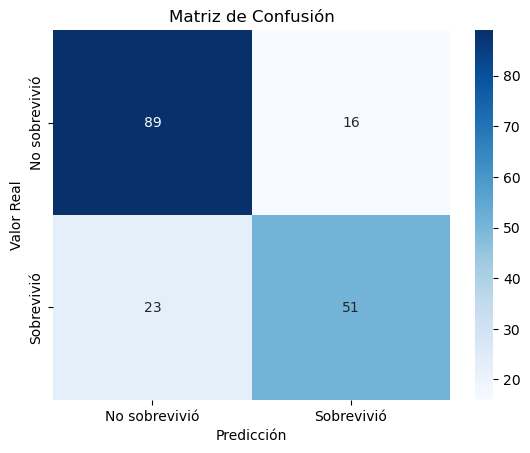

In [18]:
print("\nMatriz de Confusión:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

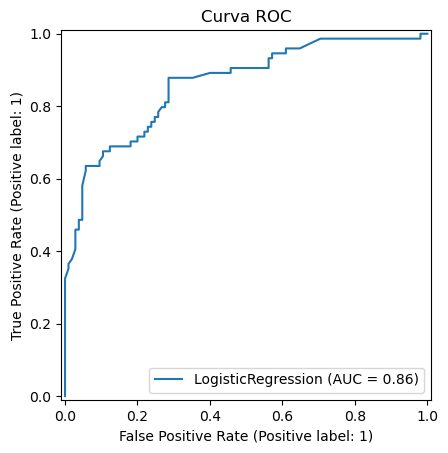

In [19]:
# Curva ROC
RocCurveDisplay.from_estimator(modelo, X_test, y_test)
plt.title('Curva ROC')
plt.show()

In [ ]:
# 7. Conclusión
print("\nConclusión:")
precision_global = modelo.score(X_test, y_test)
print(f"La precisión general del modelo es de: {precision_global * 100:.2f}%.")


Conclusión:
La precisión general del modelo es de: 78.21%.
